# Likharev - long dirty SNS link
This notebook computes the current phase relation at arbitrary temperatures for a SNS junction when the mean free path in N is much less than the coherence length.

For the normal metal, the coherence length is,

$$ \xi_N(T) = \sqrt{\frac{\hbar D}{2 \pi k_B T}} $$

The current phase relation is given as,

$$ I_S R_N = \frac{\pi \Delta^2}{4 e k_B T} \sum_{n = 0}^\infty \frac{8}{\pi^2 (2n+1)^2} \frac{l_n}{\sinh{l_n}} \sin\phi$$

where $l_n  = \sqrt{2n+1} \frac{L}{\xi_N(T)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize

## Solve for gap

In [3]:
def f(x,t,N=100):
    '''
        N limits the number of terms in the sum
    '''
    n_vec = np.arange(N)
    res_vec = 1.0/(n_vec + 0.5) - 1.0/np.sqrt((n_vec+0.5)**2 + x**2/t**2)
    return np.sum(res_vec)

In [4]:
t = 0.1
def g(x,t,N=100):
    return f(x,t,N) + np.log(t)

root = scipy.optimize.root(g,args=(t,),x0 = 1/2)
print(root.x)

[0.28078506]


In [5]:
t_vec = np.linspace(0.1,1,250)
x_vec = np.array([scipy.optimize.root(g,args=(t,100),x0 = t/2).x for t in t_vec])

Text(0, 0.5, '$\\frac{\\Delta(T)}{2 \\pi k_B T_c}$')

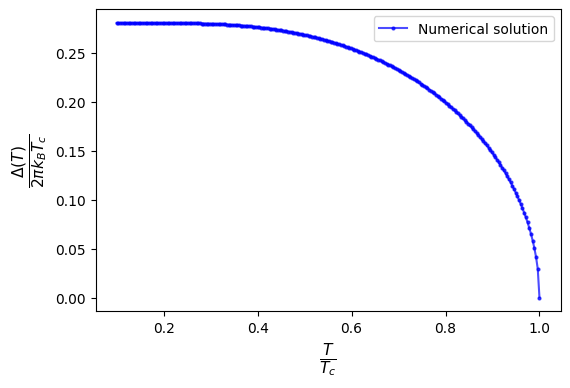

In [6]:
plt.figure(dpi=100)
plt.plot(t_vec,x_vec,label="Numerical solution",color="b",marker="o",alpha=0.7,markersize=2)
plt.legend()
plt.xlabel(r"$\frac{T}{T_c}$",fontsize=16)
plt.ylabel(r"$\frac{\Delta(T)}{2 \pi k_B T_c}$",fontsize=16)

## Critical current vs T
I am going to ignore physical constants that only change the scale of $I_c$. $L$ and $\xi_N(T)$ will be normalized by $\xi_N(T_c)$

In [59]:
def calc_Ic(t,L,N=100):
    '''
        N limits the number of terms in the sum
        L is in terms of xi_N(T_c)
    '''
    n_vec = np.arange(N)
    l_n_vec = np.sqrt(2*n_vec + 1) * L*np.sqrt(t)
    term_vec = (8/((np.pi**2)*(2*n_vec+1)**2))*l_n_vec/np.sinh(l_n_vec)
    
    # calculate gap
    root = scipy.optimize.root(g,args=(t,),x0 = 1/2)
    Delta = root.x
    #print(Delta,np.sum(term_vec))
    Ic = Delta**2/t * np.sum(term_vec)
    return Ic
    

In [60]:
calc_Ic(0.5,0.01,N=100)

array([0.1440267])

### Study I : Dependence on temprature for fixed L

Text(0, 0.5, 'Critical current $I_c$')

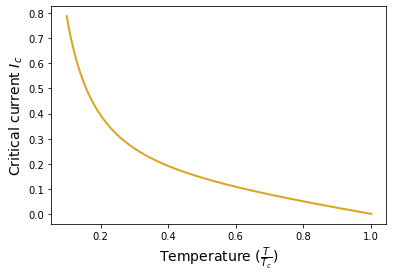

In [61]:
L = 0.01
t_vec = np.linspace(0.1,1,250)
Ic_vec = np.array([calc_Ic(t,L,N=1000) for t in t_vec])

plt.plot(t_vec,Ic_vec,color="goldenrod",linewidth=2)
plt.xlabel(r"Temperature $(\frac{T}{T_c})$", fontsize=14)
plt.ylabel(r"Critical current $I_c$", fontsize=14)

Text(0, 0.5, 'Critical current $I_c$')

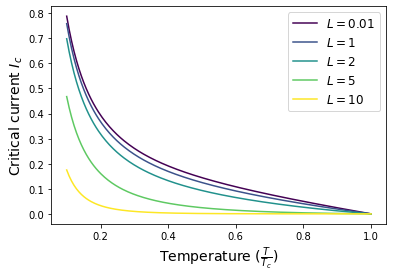

In [62]:
L_vec = [0.01,1,2,5,10]
colors = plt.get_cmap('viridis',5)
for ind,L in enumerate(L_vec):
    Ic_vec = np.array([calc_Ic(t,L,N=1000) for t in t_vec])
    plt.plot(t_vec,Ic_vec,color=colors(ind/len(L_vec)),label=f"$L = ${L}")
plt.legend(fontsize=12)
plt.xlabel(r"Temperature $(\frac{T}{T_c})$", fontsize=14)
plt.ylabel(r"Critical current $I_c$", fontsize=14)

### Study II : Changing L and fixed T 

Text(0, 0.5, 'Critical current $I_c$')

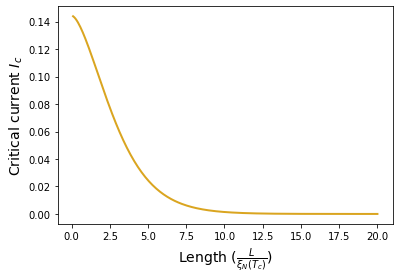

In [63]:
t = 0.5
L_vec = np.linspace(0.1,20,250)
Ic_vec = np.array([calc_Ic(t,L,N=1000) for L in L_vec])

plt.plot(L_vec,Ic_vec,color="goldenrod",linewidth=2)
plt.xlabel(r"Length $(\frac{L}{\xi_N(T_c)})$", fontsize=14)
plt.ylabel(r"Critical current $I_c$", fontsize=14)

Text(0, 0.5, 'Critical current $I_c$')

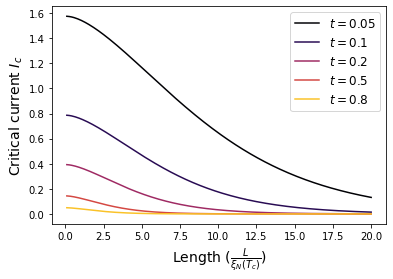

In [87]:
t_vec = [0.05,0.1,0.2,0.5,0.8]
L_vec = np.linspace(0.1,20,250)
colors = plt.get_cmap('inferno',8)
for ind,t in enumerate(t_vec):
    Ic_vec = np.array([calc_Ic(t,L,N=100) for L in L_vec])
    plt.plot(L_vec,Ic_vec,color=colors(ind/len(t_vec)),label=f"$t = ${t}")
plt.legend(fontsize=12)
plt.xlabel(r"Length $(\frac{L}{\xi_N(T_c)})$", fontsize=14)
plt.ylabel(r"Critical current $I_c$", fontsize=14)

/home/qmdlab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in sinh
  


Text(0, 0.5, 'Critical current $I_c$')

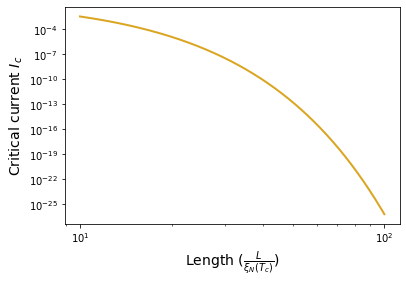

In [98]:
t = 0.4
L_vec = np.linspace(10,100,250)
Ic_vec = np.array([calc_Ic(t,L,N=1000) for L in L_vec])

plt.loglog(L_vec,Ic_vec,color="goldenrod",linewidth=2)
plt.xlabel(r"Length $(\frac{L}{\xi_N(T_c)})$", fontsize=14)
plt.ylabel(r"Critical current $I_c$", fontsize=14)